In [1]:
import yfinance as yf
import pandas as pd

### Import Data

Import data from Yahoo Finance Website


In [2]:
sp500 = yf.Ticker("^GSPC") 

In [3]:
sp500 = sp500.history(period="max")

In [ ]:
sp500.index = pd.to_datetime(sp500.index)

In [37]:
sp500.index = sp500.index.date
sp500

,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1931-12-29,7.960000,0,8.100000,1,1.012723,1.0,0.996994,3.0,0.821282,24.0,0.582074,105.0,0.394305,521.0
1931-12-30,8.100000,0,8.120000,1,1.008717,2.0,1.019381,3.0,0.837787,25.0,0.593657,105.0,0.401432,521.0
1931-12-31,8.120000,0,7.560000,0,1.001233,2.0,1.017544,4.0,0.842149,25.0,0.596489,105.0,0.402615,522.0
1932-01-04,7.560000,0,7.550000,0,0.964286,1.0,0.956962,3.0,0.785781,25.0,0.556754,104.0,0.375034,522.0
1932-01-05,7.550000,0,8.080000,1,0.999338,0.0,0.960804,3.0,0.787963,24.0,0.557255,104.0,0.374726,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-19,4967.229980,3878750000,5010.600098,1,0.995601,0.0,0.988945,0.0,0.976660,29.0,1.082887,135.0,1.203394,529.0
2024-04-22,5010.600098,3820250000,5070.549805,1,1.004347,1.0,0.999618,1.0,0.984812,29.0,1.091510,135.0,1.213284,530.0
2024-04-23,5070.549805,3751400000,5071.629883,1,1.005947,2.0,1.010806,2.0,0.996009,30.0,1.103609,136.0,1.227135,531.0
2024-04-24,5071.629883,3656740000,5048.419922,0,1.000106,2.0,1.009033,3.0,0.995752,30.0,1.102869,137.0,1.226735,531.0


In [38]:
sp500.columns

Index(['Close', 'Volume', 'Tomorrow', 'Target', 'Close_Ratio_2', 'Trend_2',
       'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60',
       'Close_Ratio_250', 'Trend_250', 'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')

<Axes: >

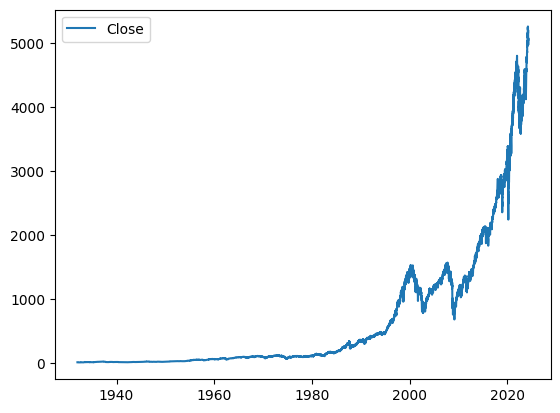

In [55]:
sp500.plot.line(y="Close")

In [40]:
sp500 = sp500[['Close', 'Volume']].copy()

In [41]:
sp500

,Close,Volume
1931-12-29,7.960000,0
1931-12-30,8.100000,0
1931-12-31,8.120000,0
1932-01-04,7.560000,0
1932-01-05,7.550000,0
...,...,...
2024-04-19,4967.229980,3878750000
2024-04-22,5010.600098,3820250000
2024-04-23,5070.549805,3751400000
2024-04-24,5071.629883,3656740000


In [42]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [43]:
sp500

,Close,Volume,Tomorrow
1931-12-29,7.960000,0,8.100000
1931-12-30,8.100000,0,8.120000
1931-12-31,8.120000,0,7.560000
1932-01-04,7.560000,0,7.550000
1932-01-05,7.550000,0,8.080000
...,...,...,...
2024-04-19,4967.229980,3878750000,5010.600098
2024-04-22,5010.600098,3820250000,5070.549805
2024-04-23,5070.549805,3751400000,5071.629883
2024-04-24,5071.629883,3656740000,5048.419922


In [44]:
sp500["Target"]=(sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [45]:
sp500

,Close,Volume,Tomorrow,Target
1931-12-29,7.960000,0,8.100000,1
1931-12-30,8.100000,0,8.120000,1
1931-12-31,8.120000,0,7.560000,0
1932-01-04,7.560000,0,7.550000,0
1932-01-05,7.550000,0,8.080000,1
...,...,...,...,...
2024-04-19,4967.229980,3878750000,5010.600098,1
2024-04-22,5010.600098,3820250000,5070.549805,1
2024-04-23,5070.549805,3751400000,5071.629883,1
2024-04-24,5071.629883,3656740000,5048.419922,0


### Train the machine learning model

In [46]:
from sklearn.ensemble import RandomForestClassifier as RFC

model = RFC(n_estimators = 100, min_samples_split = 100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [47]:
from sklearn.metrics import precision_score 

preds = model.predict(test[predictors])

In [48]:
preds = pd.Series(preds,index=test.index)

In [49]:
precision_score(test["Target"], preds)

0.7

In [50]:
combined = pd.concat([test["Target"],preds],axis=1)

<Axes: >

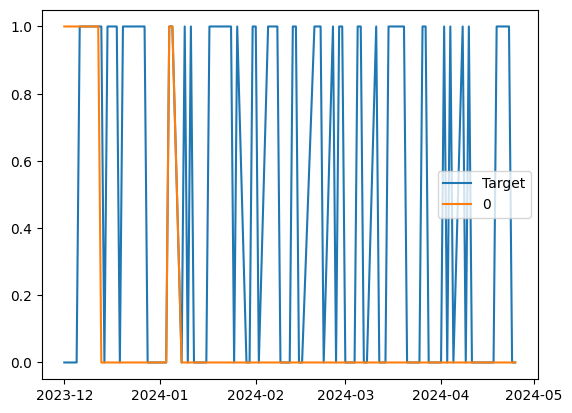

In [51]:
combined.plot()

In [52]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series (preds,index = test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds],axis=1)
    return combined

In [53]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict (train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    

In [54]:
predictions = backtest(sp500, model, predictors)

In [56]:
predictions["Predictions"].value_counts()

Predictions
0    11417
1     9278
Name: count, dtype: int64

In [57]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5203707695624057

In [58]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.528823
0    0.471177
Name: count, dtype: float64

In [59]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500 ["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [60]:
new_predictors

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_60',
 'Trend_60',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']

In [61]:
sp500 = sp500.dropna()

In [62]:
sp500

,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1936-01-10,13.780000,0,13.720000,0,1.004007,1.0,1.010560,3.0,1.066921,36.0,1.288915,136.0,1.510418,481.0
1936-01-13,13.720000,0,13.800000,1,0.997818,1.0,1.001606,3.0,1.059760,35.0,1.281161,136.0,1.502916,480.0
1936-01-14,13.800000,0,13.710000,0,1.002907,1.0,1.004806,3.0,1.063420,35.0,1.286406,137.0,1.510739,480.0
1936-01-15,13.710000,0,13.770000,1,0.996728,1.0,0.998107,2.0,1.053791,35.0,1.275757,137.0,1.499877,480.0
1936-01-16,13.770000,0,13.750000,0,1.002183,1.0,1.001018,3.0,1.055806,35.0,1.279069,137.0,1.505417,481.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-18,5011.120117,3619760000,4967.229980,0,0.998895,0.0,0.991517,0.0,0.985608,30.0,1.093250,136.0,1.214624,530.0
2024-04-19,4967.229980,3878750000,5010.600098,1,0.995601,0.0,0.988945,0.0,0.976660,29.0,1.082887,135.0,1.203394,529.0
2024-04-22,5010.600098,3820250000,5070.549805,1,1.004347,1.0,0.999618,1.0,0.984812,29.0,1.091510,135.0,1.213284,530.0
2024-04-23,5070.549805,3751400000,5071.629883,1,1.005947,2.0,1.010806,2.0,0.996009,30.0,1.103609,136.0,1.227135,531.0


In [63]:
model = RFC(n_estimators = 200, min_samples_split =50, random_state = 1) 

In [64]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds [preds >= .6] = 1
    preds [preds < .6] = 0
    preds = pd.Series (preds,index = test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds],axis=1)
    return combined

In [65]:
predictions = backtest(sp500, model, new_predictors)

In [66]:
predictions["Predictions"].value_counts()

Predictions
0.0    16445
1.0     3249
Name: count, dtype: int64

In [67]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5924899969221299

In [68]:
predictions["Predictions"].value_counts() / predictions.shape[0]

Predictions
0.0    0.835026
1.0    0.164974
Name: count, dtype: float64

In [69]:
predictions

,Target,Predictions
1946-01-09,1,0.0
1946-01-10,1,0.0
1946-01-11,1,0.0
1946-01-14,1,0.0
1946-01-15,1,0.0
...,...,...
2024-04-18,0,0.0
2024-04-19,1,0.0
2024-04-22,1,0.0
2024-04-23,1,0.0


## S&P 500 on average increased 15 % of the time and gone down by 85% of the time in the last 20695 trading days